In [1]:
%load_ext autoreload
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
%autoreload

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from keras.optimizers import RMSprop
from keras import backend as K
from keras.models import load_model
%matplotlib inline

import pickle

#
from vgg16_siamese import vgg16_siamese, contrastive_loss
import data_processing as data_p

IMG_DIR = "../../data/ssd-images/"


def show_images(images, cols = 1, titles = None):
    """source: https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1 """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [3]:
def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

sVgg16 = load_model('./svgg16_model_1.h5', custom_objects={
    'contrastive_loss': contrastive_loss,
    'accuracy': accuracy
})

In [15]:
test_batches = pickle.load(open('./batches/test_batches.pkl', 'rb'))
test_batches[1]

,id_0,id_1,match
40066,7084db41e7781b1ba3762179700e7a04bc307f0b,5b9361958cbe0888aaa0cb6c6452c41247904716,False
56133,44dfa81a1f699e80ce3a682db25e82a774152116,4a6aafd0c8d6f7de71b697b09c1c5f6573eea797,True
18831,55fdbc21ef9089f1721e2f3be7b4dfb22216d002,ceac2bcccb02d7944b933fed02d0e6805a83c0e7,False
68610,261eb65bd320020097360a875f79b7f08980ff1d,659fd01bf228e18b672d59de57c28e394de9c2e7,False
29410,39573bb29e50777f08b3291397efbc0053d675de,9cbda1dced2ad49155b98b0e86a158d350dfdfc2,False
13707,5bfa8ea84bed2c3b5fc0537a01b2d9cefbaf78d1,e84700b5497cf4acec9c6762b9e531bbaad3ec7f,False
21553,a8b5bafeee96ed652fe46c60acda8d51dd5e5b5a,3725834b8cb040087f40dbd176a0e8a0a7f5a62c,False
77674,ed41306930dcf2402d7121dfb3cefdf23db494b1,b373ef9a84ddae9dcc0647f022828cb7e47f7747,False
9536,20b3a374a6fe6784f16325f4f8163b7d662d95e1,bd39dd29c349221d2693da154a942f477fd682e2,True
70435,1364eb28726a63adb311ac59b77c063124c777f1,c08279c9e24928ad8ec996f2e8d79bfe1eae3557,False


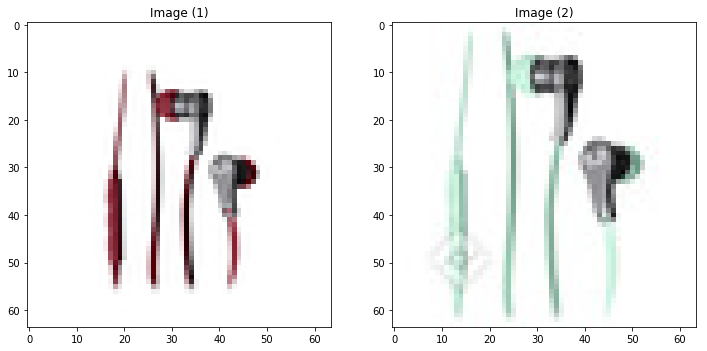

array([[0.31299627]], dtype=float32)

In [12]:
def predict_pair(model, left, right):
    show_images([data_p.id_to_jpg(left, IMG_DIR) / 255, data_p.id_to_jpg(right, IMG_DIR) / 255])
    test_img_a, test_img_b = data_p.preprocess_input(np.array([
        data_p.id_to_jpg(left, IMG_DIR),
        data_p.id_to_jpg(right, IMG_DIR)
    ]), mode='tf')
    return model.predict_on_batch([np.array([test_img_a]), np.array([test_img_b])])
    
predict_pair(sVgg16, '5bfa8ea84bed2c3b5fc0537a01b2d9cefbaf78d1', 'e84700b5497cf4acec9c6762b9e531bbaad3ec7f')

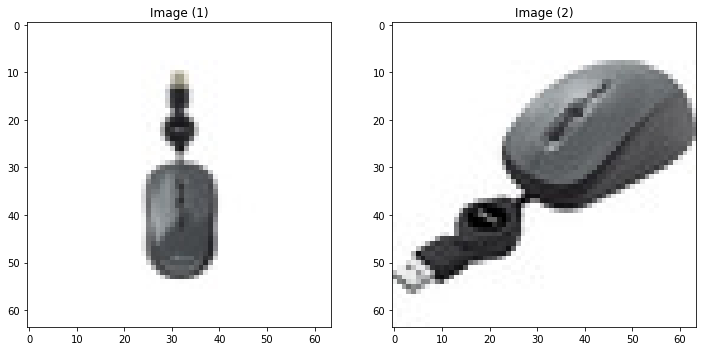

array([[0.375711]], dtype=float32)

In [14]:
predict_pair(sVgg16, '00f10cb2df0430a526bda386a08ef53dcdac5227', 'cfa97c4965edd3554a2941ecf9a539c8cb033aa4')

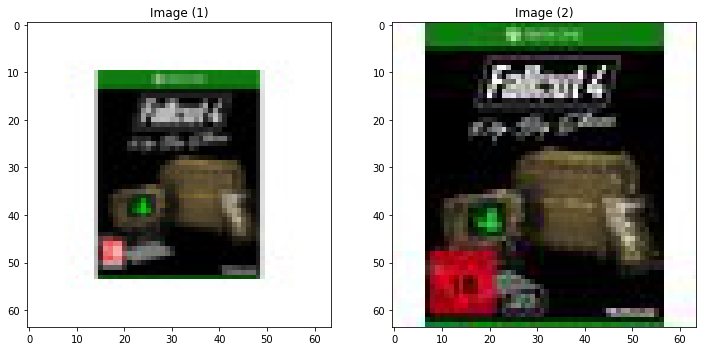

array([[0.2243567]], dtype=float32)

In [17]:
predict_pair(sVgg16, 'e341036ae86df5b001560b0c5a1a6848afacbbe1', '24b76b76d628b594b507fe025ae3d8d2b41c7401')

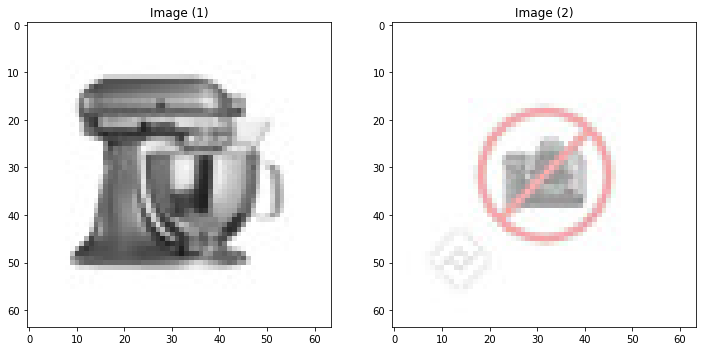

array([[1.0304399]], dtype=float32)

In [19]:
predict_pair(sVgg16, 'e42248fb7409d4c9c48f7dddbde759f6b0856399', '134880a47ef6cfa0682107587bd773dd02febf11')

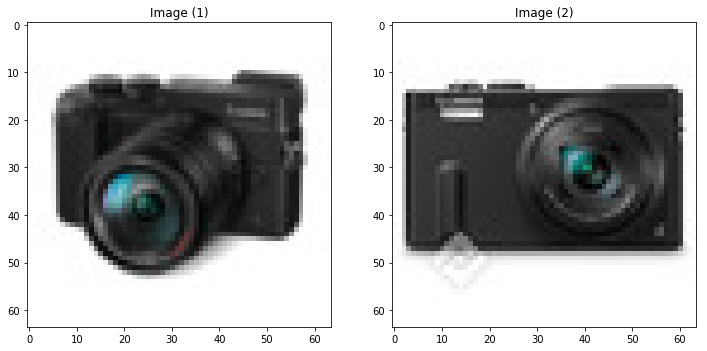

array([[0.93325865]], dtype=float32)

In [21]:
predict_pair(sVgg16, '55fdbc21ef9089f1721e2f3be7b4dfb22216d002', 'ceac2bcccb02d7944b933fed02d0e6805a83c0e7')